In [2]:
import matplotlib as mpl
import numpy as np
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:


# Initialize an empty list to hold the DataFrames
dataframes = []

# Loop over the list of CSV files
for idx in range(1, 16):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(f'../data/p{idx}/p{idx}_main.csv')
    df = df[(df["move_times"] > 0.4) & (df['mean_velocity'] > 20)]
    # Add a new column for the participant number
    df['participant_number'] = idx   # +1 to start counting participants from 1 instead of 0
    
    # Append the DataFrame to the list
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df['vibration'] = combined_df['vibration'].replace({
    0: 'No Vibration',
    1: 'Dual',
    2: 'Triceps',
    3: 'Biceps'
})

# Save the combined DataFrame to a new CSV file (optional)
combined_df.to_csv('combined_participants.csv', index=False)

# Display the combined DataFrame
combined_df.sample(5)


,trial_num,move_times,elbow_start_volts,elbow_start_pix,elbow_start_cm,elbow_start_deg,elbow_end_volts,elbow_end_pix,elbow_end_cm,elbow_end_deg,...,full_feedback,terminal_feedback,rotation_direction,rotation,rotation_angle,clamp,clamp_angle,vibration,trial_type,participant_number
1447,21,0.808984,4.207045,-1692.655101,-52.694496,72.434088,3.797817,-630.257732,-19.620721,100.844688,...,0,0,0,0,0,0,0,Biceps,0,7
909,198,0.763356,4.239913,-1690.256978,-52.619840,70.154222,3.774938,-502.246605,-15.635573,102.445573,...,0,0,0,0,0,0,0,No Vibration,0,4
3498,177,0.808089,4.172567,-1683.121757,-52.397711,74.825712,3.626714,-266.042274,-8.282233,112.721211,...,0,0,0,0,0,0,0,No Vibration,0,15
2104,208,1.237226,4.178045,-1687.330793,-52.528744,74.445734,3.514901,34.150929,1.063162,120.481549,...,0,1,0,0,0,0,0,No Vibration,0,9
1848,191,0.940073,4.180623,-1694.017398,-52.736906,74.266921,3.571613,-112.670896,-3.507588,116.555244,...,0,0,0,0,0,0,0,No Vibration,0,8


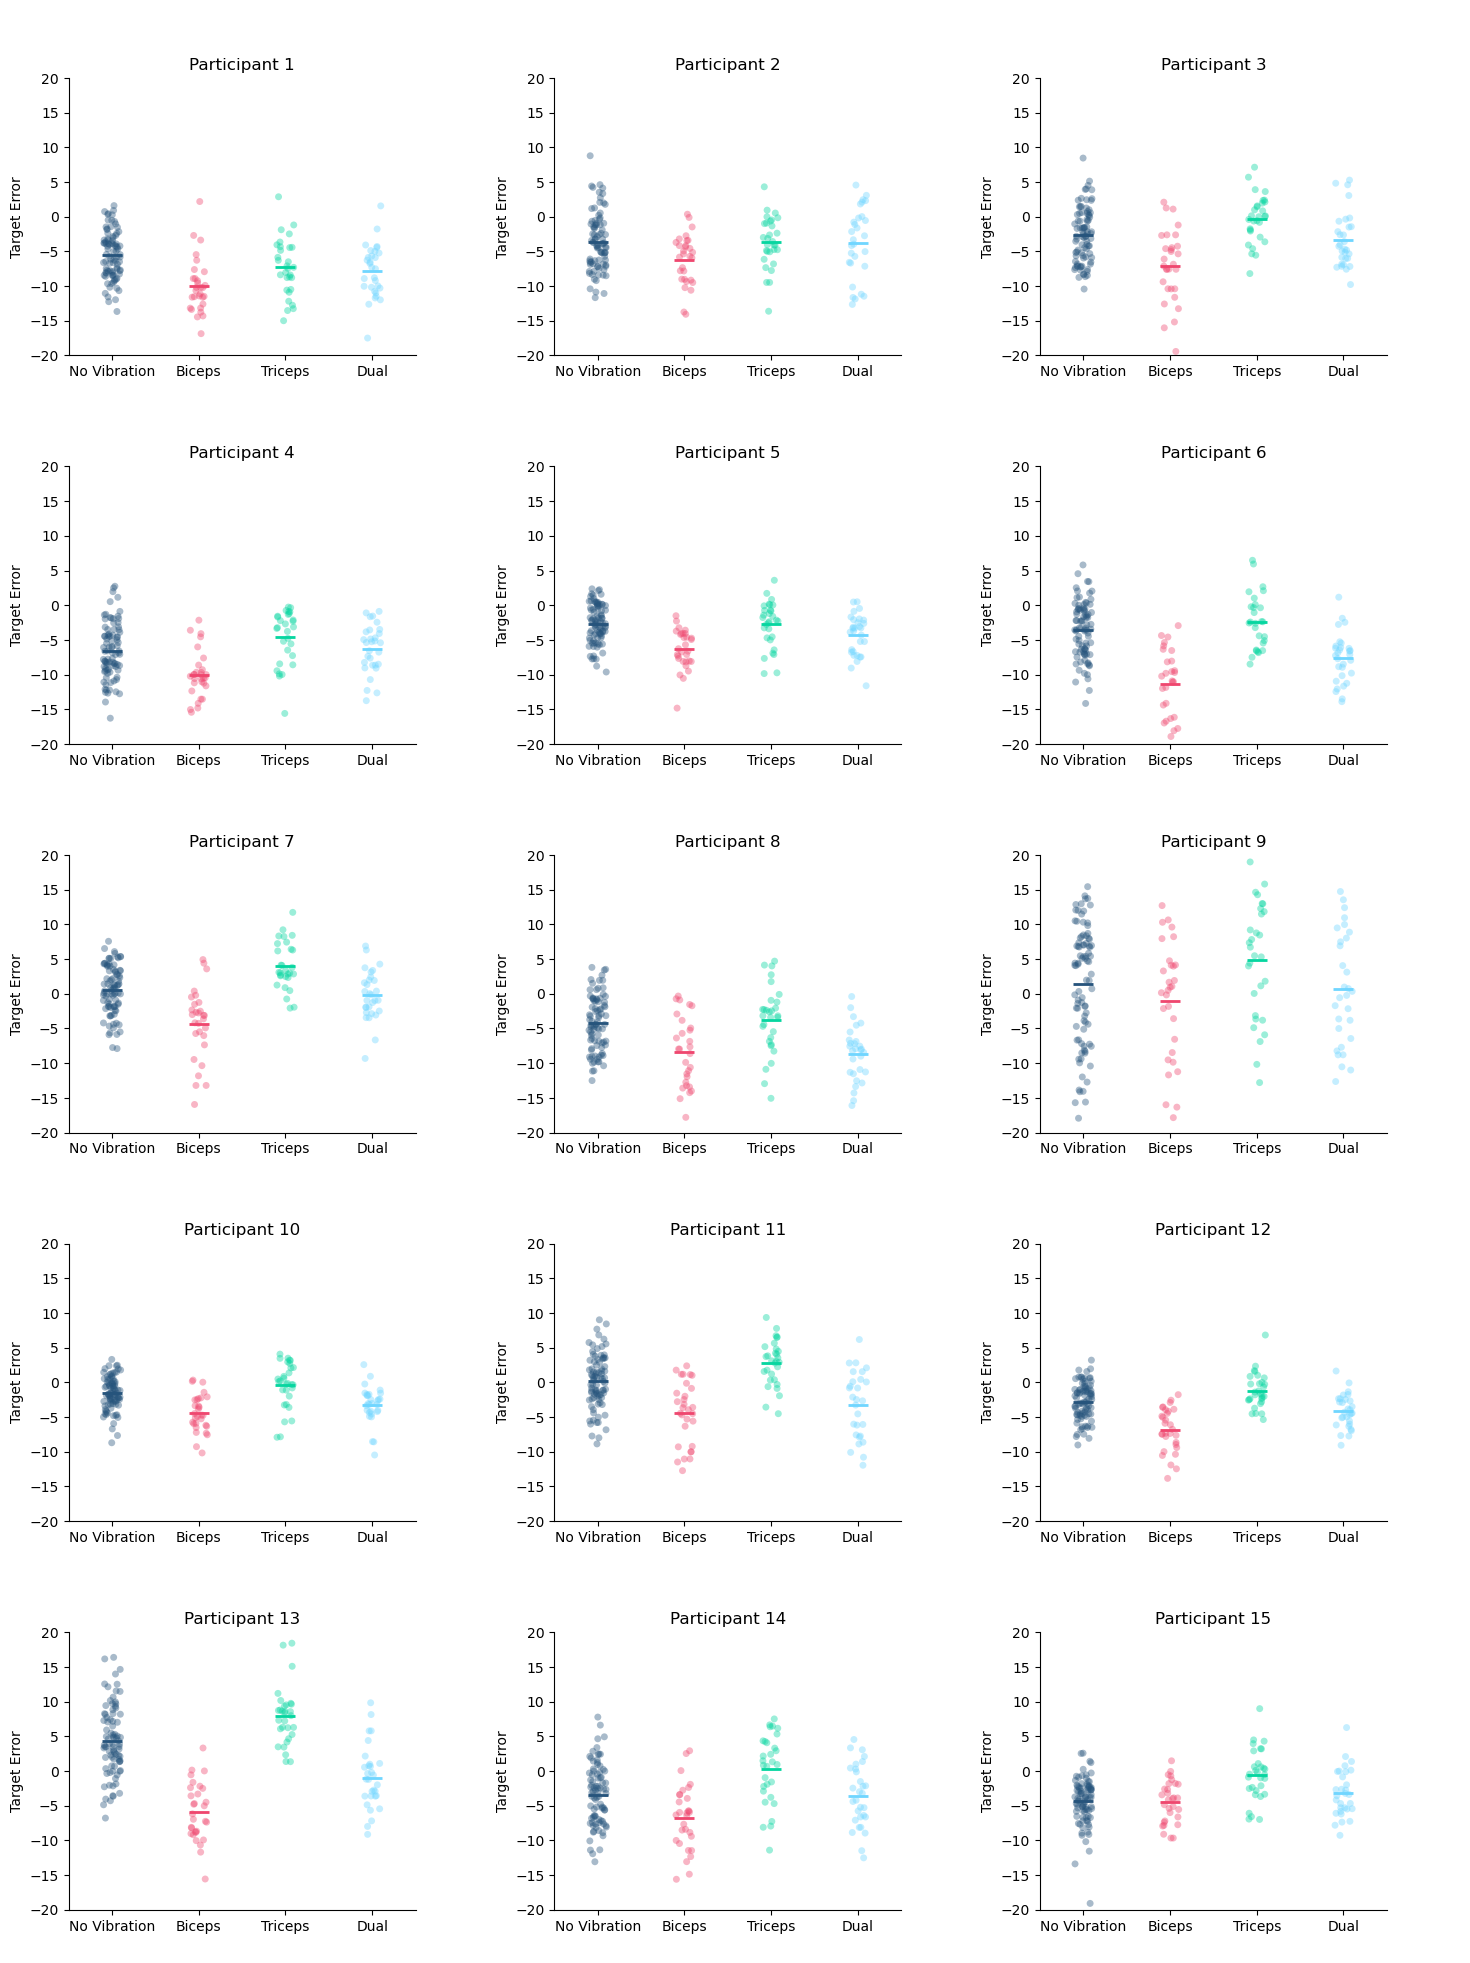

In [10]:
colours4 = ['#26547c', '#ef476f','#06d6a0','#70d6ff']


# Create a 5x3 grid of subplots
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
fig.tight_layout(pad=5.0)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a figure for each participant
participants = combined_df['participant_number'].unique()
for i, participant in enumerate(participants):
    # Filter the DataFrame for the current participant
    participant_df = combined_df[combined_df['participant_number'] == participant]
    participant_df = participant_df[participant_df['terminal_feedback'] == 0]
    # Plot the error column with different colors for each vibration condition
    sns.stripplot(x='vibration', y='error', hue='vibration', data=participant_df, jitter=True, ax=axes[i], palette=colours4, dodge=False, alpha=0.4)
    sns.pointplot(x='vibration', y='error', data=participant_df, hue='vibration', estimator='mean', marker='_', markersize=15, 
                  errorbar=None, ax=axes[i], palette=colours4)

    # Set the title and labels
    axes[i].set_ylim(-20, 20)
    axes[i].set_title(f'Participant {participant}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel('Target Error')

    # Remove the legend for individual subplots to avoid clutter
    # axes[i].get_legend().remove()

# Add a single legend for the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='', frameon=False)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Save the combined figure to a file (optional)
plt.savefig('../results/participants_error_plot.png')

# Show the combined figure
plt.show()

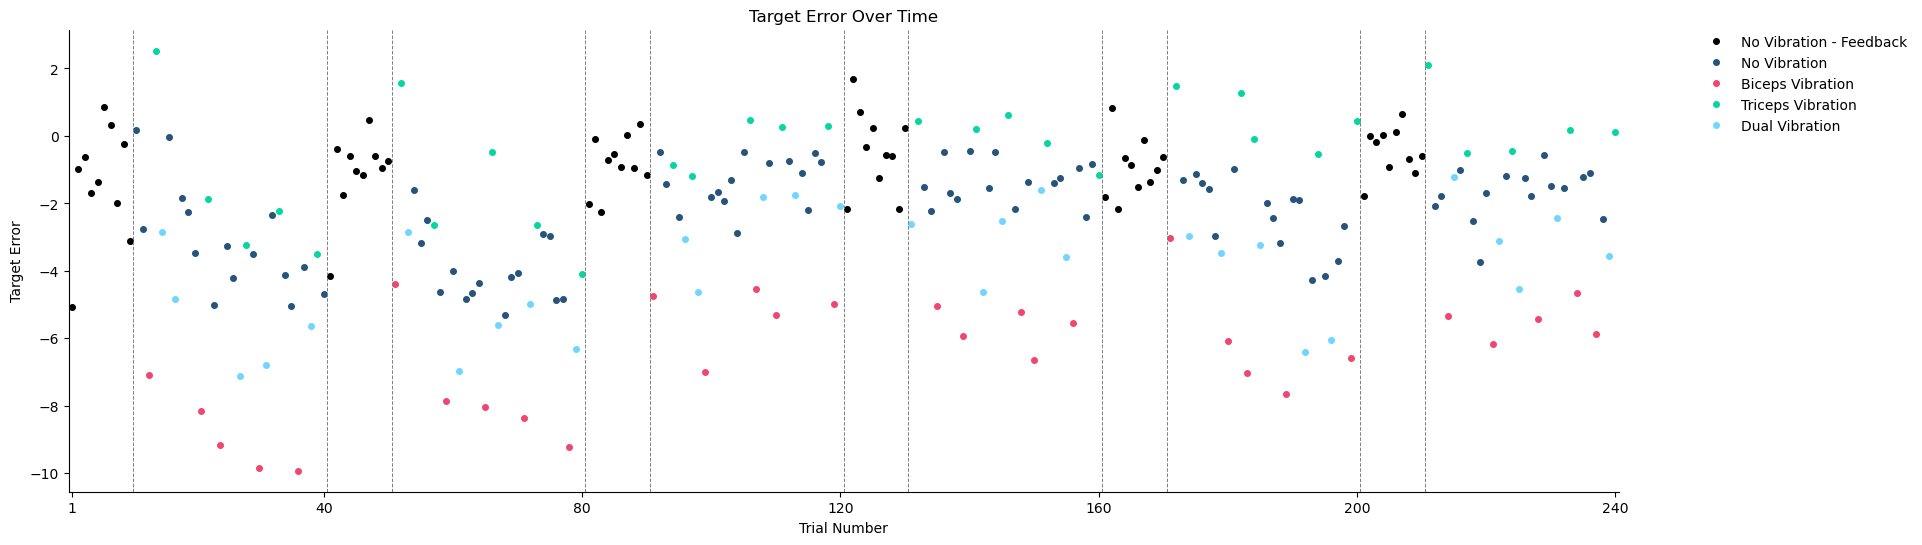

In [11]:
colours5 = ['#000000', '#26547c', '#ef476f','#06d6a0','#70d6ff']
combined_df['hue_combined'] = combined_df['vibration'].astype(str) + '_' + combined_df['terminal_feedback'].astype(str)
# Define the positions of the vertical lines
trial_dividers = [-.5, 9.5, 39.5, 49.5, 79.5, 89.5, 119.5, 129.5, 159.5, 169.5, 199.5, 209.5]

fix, ax = plt.subplots(figsize=(20, 6))
sns.pointplot(x='trial_num', y='error', data=combined_df, hue='hue_combined', estimator='mean', errorbar=None, linestyles="",  markersize=3, palette=colours5)
ax.set_xticks([0, 39, 79, 119, 159, 199, 239])
ax.set_ylabel("Target Error")
ax.set_xlabel("Trial Number")
ax.set_title("Target Error Over Time")

# Add vertical lines
for divider in trial_dividers:
    plt.axvline(x=divider, color='grey', linestyle='--', linewidth=0.7)

# Define custom labels
custom_labels = ['No Vibration - Feedback', 'No Vibration', 'Biceps Vibration', 'Triceps Vibration', 'Dual Vibration']  # Adjust as needed

# Get the handles and labels from the plot
handles, labels = ax.get_legend_handles_labels()

# Set the custom labels
plt.legend(handles, custom_labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=False)
plt.savefig('../results/average-time-plot.png')
